In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import json

In [2]:
from frbpa.search import riptide_search, p4j_search, pr3_search
from frbpa.utils import get_phase

In [3]:
with open('190303_data.json', 'r') as f:
    data = json.load(f)

burst_dict = data['bursts']
startmjds_dict = data['obs_startmjds']
duration_dict = data['obs_duration']

In [4]:
all_bursts = []
for k in burst_dict.keys():
    all_bursts += burst_dict[k]

In [5]:
bursts = np.array(burst_dict['CHIME'])
unique_days = np.unique(np.round(bursts))

startmjds = np.array(startmjds_dict['CHIME'])
durations = np.array(duration_dict['CHIME'])

In [6]:
len(bursts) == len(unique_days)

True

In [7]:
np.min(bursts)

58545.462936697346

## Pearson chi-square test (PR3)

In [8]:
rch, p = pr3_search(bursts=bursts, obs_mjds=startmjds, 
                    obs_durations=durations, pmin=np.pi*1, pmax=np.pi*100)

100%|██████████| 980140/980140 [07:09<00:00, 2281.63it/s]
2020-06-19 12:57:58,433 - pr3_search -root - INFO - Max reduced chi square value is 95.82460396746112 at period of 4.004385637121674


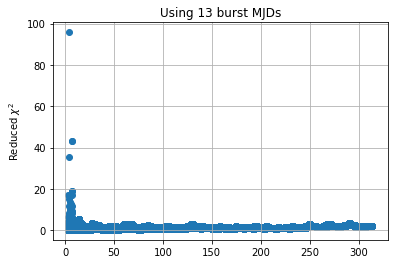

In [9]:
plt.scatter(p, rch)
plt.ylabel(r'Reduced $\chi^2$')
plt.title(f'Using {len(bursts)} burst MJDs')
plt.grid()

In [10]:
mask = (p > 10) & (p < 40)

In [11]:
p[mask][np.argmax(rch[mask])]

13.995522040021564

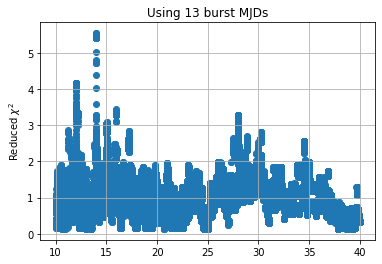

In [12]:
plt.scatter(p[mask], rch[mask])
plt.ylabel(r'Reduced $\chi^2$')
plt.title(f'Using {len(bursts)} burst MJDs')
plt.grid()

In [13]:
# rch_uniq, p_u = pr3_search(bursts=unique_days, obs_mjds=startmjds, 
#                     obs_durations=durations, pmin=np.pi*1, pmax=np.pi*100)

In [14]:
# plt.scatter(p_u, rch_uniq)
# plt.ylabel(r'Reduced $\chi^2$')
# plt.title(f'Using {len(unique_days)} burst MJDs from activity days')
# plt.grid()

# Searching for period with narrowest folded profile (Rajwade et al 2020)

In [15]:
all_bursts = np.array(all_bursts)
all_bursts = np.sort(all_bursts - np.min(all_bursts))

In [16]:
unique_days = np.unique(np.round(all_bursts))

In [17]:
cont_frac, p = riptide_search(all_bursts, pmin=2, pmax=300)

2020-06-19 12:58:07,958 - riptide_search -root - WARNING - Period/nbins should be greater than tsamp. Not all periods in the given range are valid. Selecting the valid periods from 2.0000243151154096 days for search.
100%|██████████| 81706/81706 [01:14<00:00, 1094.19it/s]
2020-06-19 12:59:22,637 - riptide_search -root - INFO - Max continuous fraction without data is 0.55 at a period of 112.11185663908671 days


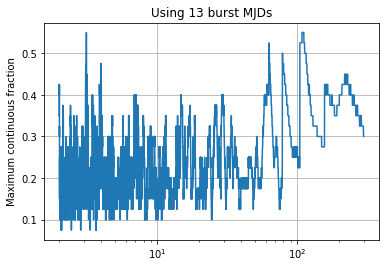

In [18]:
plt.plot(p, cont_frac)
plt.ylabel(r'Maximum continuous fraction')
plt.title(f'Using {len(all_bursts)} burst MJDs')
plt.xscale('log')
plt.grid()

In [19]:
mask = (p > 2) & (p < 10)
p[mask][np.argmax(cont_frac[mask])]

3.126332037231612

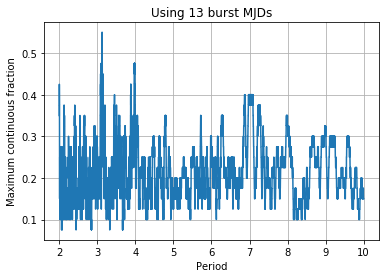

In [20]:
plt.plot(p[mask], cont_frac[mask])
plt.ylabel(r'Maximum continuous fraction')
plt.title(f'Using {len(all_bursts)} burst MJDs')
plt.xlabel('Period')
plt.grid()

In [21]:
mask = (p > 30) & (p < 150)
p[mask][np.argmax(cont_frac[mask])]

112.11185663908671

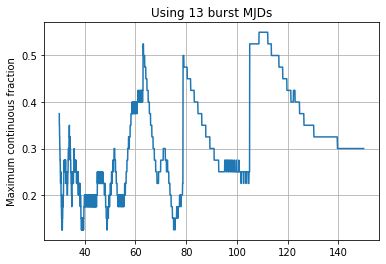

In [22]:
plt.plot(p[mask], cont_frac[mask])
plt.ylabel(r'Maximum continuous fraction')
plt.title(f'Using {len(all_bursts)} burst MJDs')
plt.grid()

### Using just unique days now

In [23]:
# cont_frac_uniq, p2 = riptide_search(unique_days, pmin=2, pmax=300)

# plt.plot(p2, cont_frac_uniq)
# plt.ylabel(r'Maximum continuous fraction')
# plt.title(f'Using {len(unique_days)} burst MJDs from activity days')
# plt.xscale('log')
# plt.grid()

# Using P4J


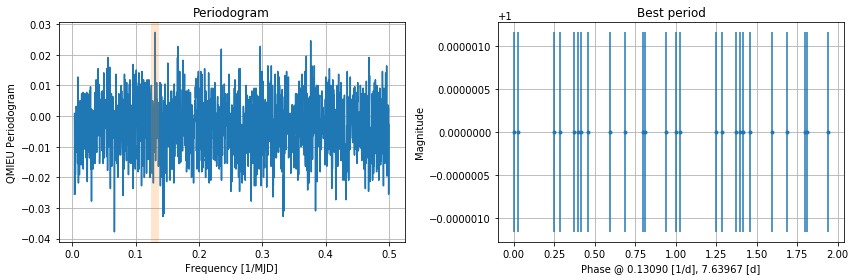

In [24]:
periodogram, _p = p4j_search(all_bursts,  pmin=2, pmax=300, plot=True, save=False)

In [25]:
# periodogram, _p = p4j_search(unique_days, pmin=1.57*4, pmax=3.14*150, plot=True, save=False)